# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [26]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

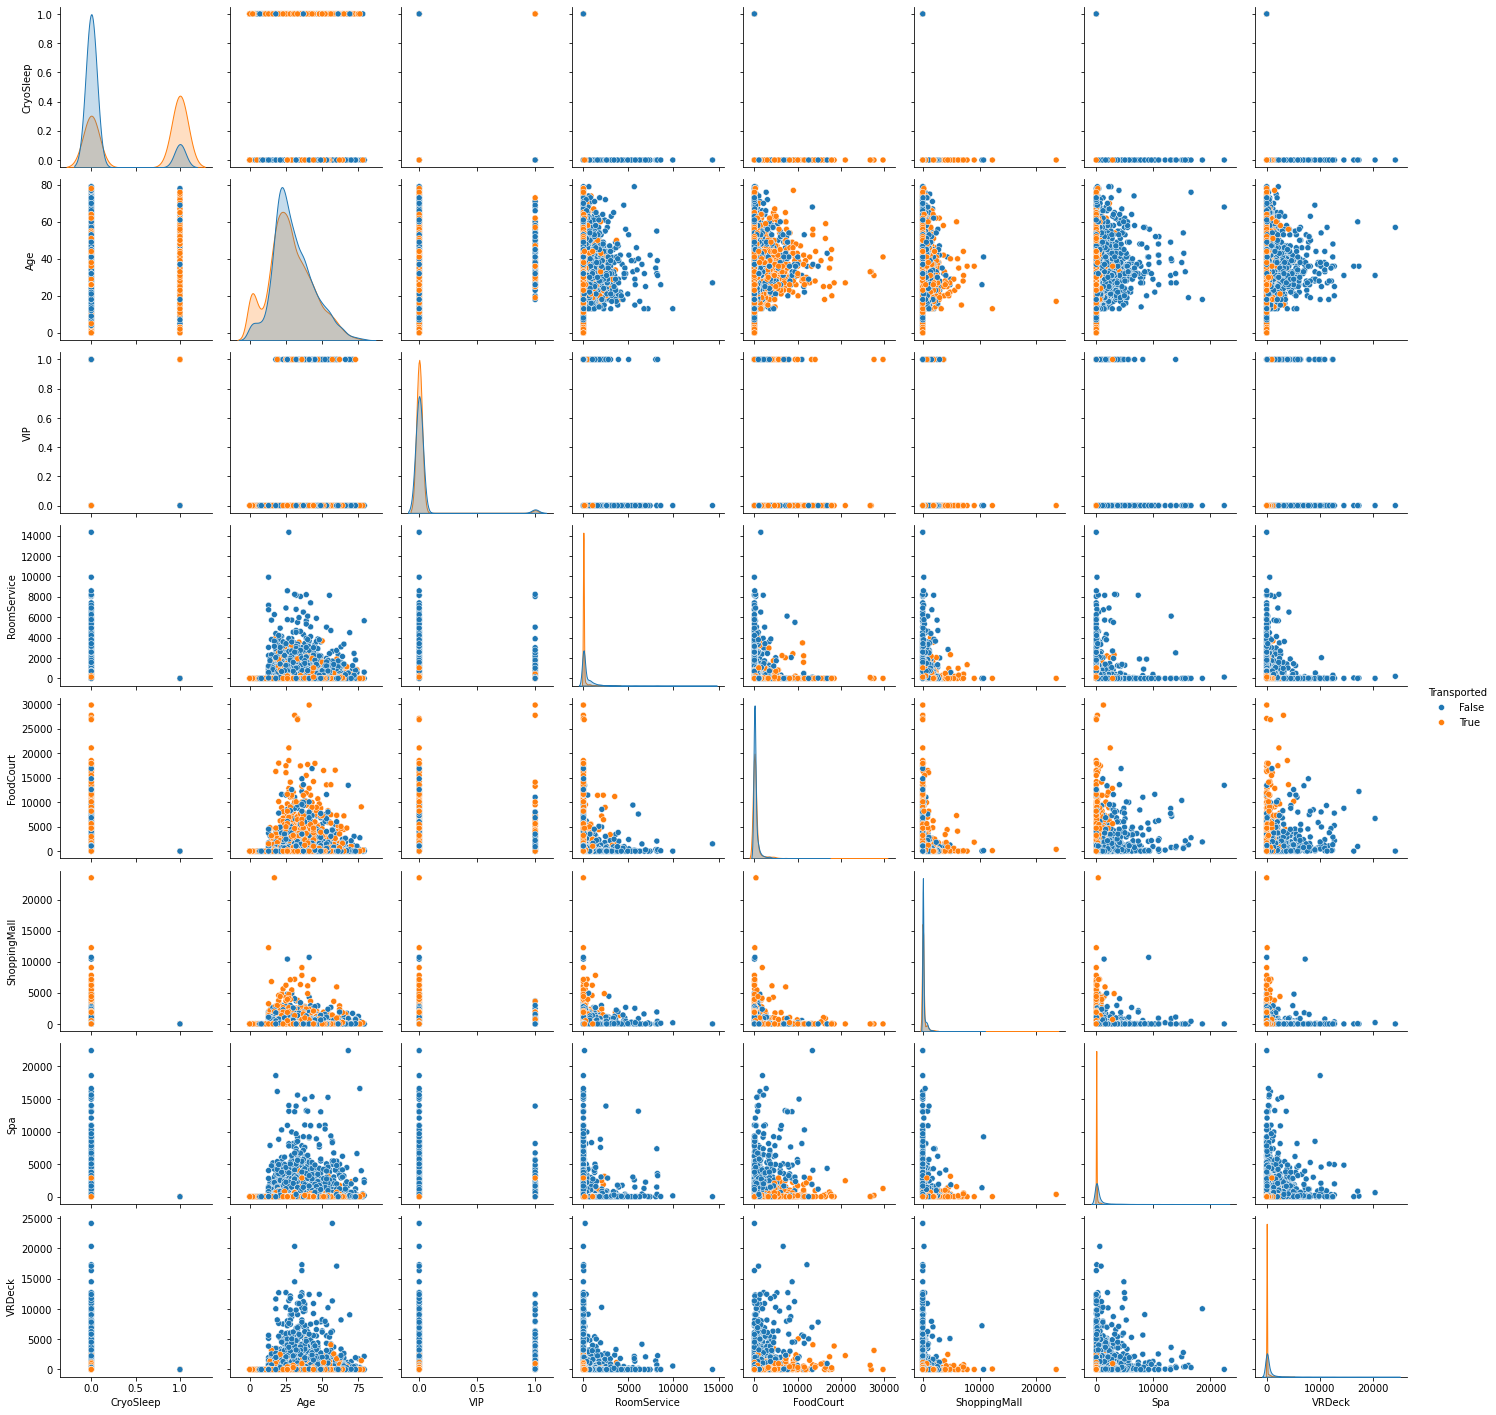

In [28]:
sns.pairplot(spaceship, hue = "Transported")
plt.show()

In [38]:
numerical_columns = spaceship.select_dtypes("number").columns
print("\nNumerical Columns:", numerical_columns)


Numerical Columns: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [42]:
cols_numerical = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
correlation_matrix = spaceship[cols_numerical].corr()
correlation_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


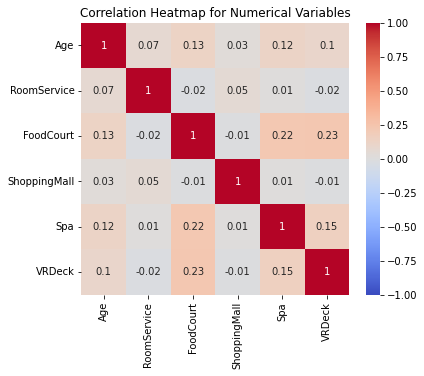

In [46]:
plt.figure(figsize=(6, 5))

# Drawing the heatmap for the numerical columns
sns.heatmap(round(correlation_matrix, 2), annot=True,
cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

**Check for data types**

In [7]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [34]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value.(I prefer to apply the filling method) 

In [48]:
def fill_missing(df, cols_numerical, cols_categorical):

    # Fill missing values in numerical columns with the mean
    for column in cols_numerical:
        df[column] = df[column].fillna(df[column].mean())

    # Fill missing values in categorical columns with the mode
    for column in cols_categorical:
        if not df[column].mode().empty:  # Check if mode exists
            df[column] = df[column].fillna(df[column].mode()[0])

    df_filled = df

    return df_filled

In [56]:
# Select categorical and numerical columns
cols_numerical = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cols_categorical = ['VIP', 'Destination', 'Cabin', 'CryoSleep', 'HomePlanet']

# Fill missing values in numerical columns with the mean and in categorical columns with the mode
spaceship = fill_missing(spaceship, cols_numerical, cols_categorical)


In [58]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [70]:
df = spaceship[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

df["target"] = spaceship["Transported"]
df.head()

<ipython-input-70-e9f50d8985ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = spaceship["Transported"]


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,target
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True


And also lets define our target.

In [76]:
features = df.drop(columns = "target")
target = df["target"]

display(features)
display(target)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: target, Length: 8693, dtype: bool

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

#random_state = 0 is a fixed order of rows being selected to training and testing

X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4278,54.0,0.0,559.0,0.0,15238.0,2799.0
5971,20.0,0.0,20.0,1.0,696.0,0.0
464,43.0,1821.0,0.0,47.0,29.0,0.0
4475,24.0,185.0,0.0,476.0,1810.0,53.0
8469,25.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,16.0,0.0,0.0,623.0,40.0,209.0
6057,2.0,0.0,0.0,0.0,0.0,0.0
2797,31.0,517.0,1.0,301.0,60.0,4.0
7110,14.0,653.0,0.0,4.0,0.0,0.0
8579,30.0,0.0,0.0,0.0,0.0,0.0


In [83]:
y_test.head()

3601     True
6057     True
2797    False
7110    False
8579     True
Name: target, dtype: bool

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [85]:
from sklearn.neighbors import KNeighborsClassifier

Fit the model to your data.

In [99]:
knn = KNeighborsClassifier(n_neighbors=13)

In [101]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [103]:
#your code here
### Age	RoomService	FoodCourt	ShoppingMall	Spa	VRDeck
import numpy as np



new_passenger = np.array([[16, 0, 0, 623, 40, 209]])
new_passenger

array([[ 16,   0,   0, 623,  40, 209]])

In [105]:
knn.predict(new_passenger)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([False])

Evaluate your model.

In [107]:
X_test["my_pred"] = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
<ipython-input-107-7a421c14cbeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["my_pred"] = knn.predict(X_test)


In [109]:
X_test["true_label"] = y_test.values

<ipython-input-109-dd4027f416a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["true_label"] = y_test.values


In [111]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,my_pred,true_label
3601,16.0,0.0,0.0,623.0,40.0,209.0,False,True
6057,2.0,0.0,0.0,0.0,0.0,0.0,True,True
2797,31.0,517.0,1.0,301.0,60.0,4.0,False,False
7110,14.0,653.0,0.0,4.0,0.0,0.0,False,False
8579,30.0,0.0,0.0,0.0,0.0,0.0,True,True


In [113]:
X_test.drop(columns = ["my_pred", "true_label"], inplace=True)

<ipython-input-113-296852bbd81a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ["my_pred", "true_label"], inplace=True)


In [115]:
from sklearn.metrics import accuracy_score


pred = knn.predict(X_test)

accuracy_score(y_test, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7602070155261644

In order to evaluate our model, I use the method "score" that give us accuracy.

It seems that our model was able to correctly predict the data points (To be precise of 76%).

In [117]:
knn.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7602070155261644

**Congratulations, you have just developed your first Machine Learning model!**